In [149]:
import pandas as pd
import numpy as np

def read_csv_1_var(filename: str):
    with open(filename) as f:
        df = f.read().split(',')
        df = [float(e) for e in df]
        df.sort()
        df = np.array(df)
        f.close()
    return df

def elements_in_each_distribution(arr, k):
    freq_dist = {}

    a = arr[:]
    a.sort()

    i = (a[-1] - a[0]) / k
    
    # creates an empty list in a dict with the key as the gap of the class
    for j in range(k):
        freq_dist[f'{round(a[0] + (j) * i, 2)} - {round(a[0] + (j+1) * i, 2)}'] = []
        
    j = 0
    for e in a:
        if e >= a[0] + (j+1) * i and j < k-1:
            j += 1
        freq_dist[f'{round(a[0] + (j) * i, 2)} - {round(a[0] + (j+1) * i, 2)}'].append(e)

    max = pd.Series([len(freq_dist[key]) for key in freq_dist.keys()]).max()

    for key in freq_dist.keys():
        while (len(freq_dist[key]) < max):
            freq_dist[key].append('')
        


    return pd.DataFrame(freq_dist)

def frequency_distribution(arr, k):
    freq_dist = {}
    freq = [0 for j in range(k)]
    n = len(arr)
    a = arr[:]
    a.sort()
    i = (a[-1] - a[0]) / k
    
    # creates an empty list in a dict with the key as the gap of the class
    gap = [f'{round(a[0] + (j) * i, 2)} - {round(a[0] + (j+1) * i, 2)}' for j in range(k)]
        
    j = 0
    for e in a:
        if e >= a[0] + (j+1) * i and j < k-1:
            j += 1
        freq[j] += 1

    freq = pd.Series(freq)
    df_freq = pd.DataFrame({
        'gap': gap,
        'F': freq,
        'F\'': freq.cumsum(),
        'f': pd.Series([j/n for j in freq]),
        'f\'': pd.Series([j/n for j in freq]).cumsum()
    }).set_index('gap')

    return df_freq




,501.0 - 526.0,526.0 - 551.0,551.0 - 576.0,576.0 - 601.0,601.0 - 626.0,626.0 - 651.0
0,501.0,528.0,556.0,589.0,601.0,629.0
1,512.0,536.0,564.0,597.0,603.0,635.0
2,516.0,546.0,567.0,,605.0,642.0
3,525.0,,,,612.0,645.0
4,,,,,615.0,648.0
5,,,,,624.0,651.0


<AxesSubplot:ylabel='gap'>

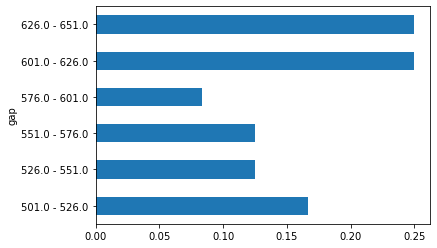

In [154]:
filename = "data.csv"
df = read_csv_1_var(filename)
df1 = frequency_distribution(df, 6)
#df1 = elements_in_each_distribution(df, 6)
df1['f'].plot.barh()

In [57]:
df = pd.Series(read_csv_1_var('data2.csv'))
less_than_5000 = df[df < 5000]
ratio = len(less_than_5000) / len(df)
ratio

0.6

<AxesSubplot:>

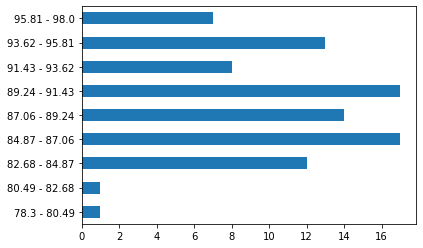

In [100]:
df = read_csv_1_var('data3.csv')
k =  int(np.sqrt(len(df)))
df, freq = frequency_distribution(df,k)
for key in df.keys():
    df[key] = np.array(df[key])
pd.Series(freq, index=df.keys()).plot.barh()


20.0

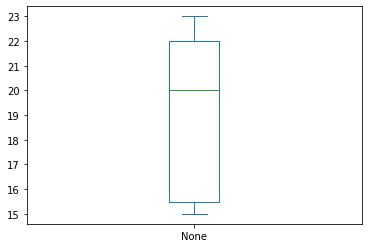

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

values = pd.Series([23, 18, 15, 22, 15, 20, 16, 15, 23, 20, 22])

values.plot.box()
values.median()